In [47]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Time for R**

In [48]:
cadata = sc.read("datasets/masked.h5ad")
adata = sc.read("datasets/tumour_cellcounts.h5ad")

**Run the results of Genefu**

In [49]:
er_her2 = pd.read_csv('R_time/scmod1.csv')
er_her2 = er_her2.rename(columns={er_her2.columns[0]: 'cellID'})
er_her2.head()

,cellID,ER..HER2.,HER2.,ER..HER2..1
0,BC01_02,0.194470,0.052545,0.752985
1,BC01_03,0.053567,0.000384,0.946048
2,BC01_04,0.019789,0.043295,0.936916
3,BC01_05,0.002792,0.000752,0.996456
4,BC01_06,0.209223,0.004393,0.786384


In [50]:
# Check for missing cellIDs in cadata.obs_names
missing_cellIDs = set(adata.obs_names) -  set(er_her2.cellID)

# Create a new DataFrame for the missing cellIDs
missing_rows = pd.DataFrame({'cellID': list(missing_cellIDs), er_her2.columns[1]: 0, er_her2.columns[2]: 0, er_her2.columns[3]: 0})

# Concatenate the missing rows with the original DataFrame
er_her2 = pd.concat([er_her2, missing_rows])

# Set the 'cellID' column as the index
er_her2 = er_her2.set_index('cellID')

# Sort the DataFrame by index
er_her2 = er_her2.sort_index()


In [51]:
er_her2

,ER..HER2.,HER2.,ER..HER2..1
cellID,,,
BC01_02,0.194470,0.052545,0.752985
BC01_03,0.053567,0.000384,0.946048
BC01_04,0.019789,0.043295,0.936916
BC01_05,0.002792,0.000752,0.996456
BC01_06,0.209223,0.004393,0.786384
...,...,...,...
BC11_69,0.479467,0.246876,0.273657
BC11_70,0.097623,0.000048,0.902329
BC11_78,0.821699,0.000260,0.178041


In [52]:
adata.obs['ER-/HER2-'] = list(er_her2[er_her2.columns[0]])
adata.obs['HER2+'] = list(er_her2[er_her2.columns[1]])
adata.obs['ER+/HER2-'] = list(er_her2[er_her2.columns[2]])

In [54]:
piechart_df = pd.DataFrame({
    'tumor_groups': adata.obs['tumor_groups'],
    'ER-/HER2-': adata.obs['ER-/HER2-'],
    'HER2+': adata.obs['HER2+'],
   'ER+/HER2-': adata.obs['ER+/HER2-']
})
piechart_df.head()

,tumor_groups,ER-/HER2-,HER2+,ER+/HER2-
BC01_02,BC01 Luminal-A,0.194470,0.052545,0.752985
BC01_03,BC01 Luminal-A,0.053567,0.000384,0.946048
BC01_04,BC01 Luminal-A,0.019789,0.043295,0.936916
BC01_05,BC01 Luminal-A,0.002792,0.000752,0.996456
BC01_06,BC01 Luminal-A,0.209223,0.004393,0.786384


In [55]:
grouped_df = piechart_df.groupby('tumor_groups').sum()
grouped_df.head(13)

,ER-/HER2-,HER2+,ER+/HER2-
tumor_groups,,,
BC01 Luminal-A,3.600273,0.844286,15.555441
BC02 Luminal-A,18.344436,0.900848,32.754716
BC03 Luminal-B,3.817360,1.233701,9.948940
BC03LN Luminal-B,2.935945,1.236077,5.827978
BC04 HER2,8.458041,13.902555,22.639404
BC05 HER2\n(Herceptin),8.321383,29.176111,37.502506
BC06 HER2,3.868298,0.312490,3.819211
BC07 TNBC,0.876198,26.143262,0.980540
BC07LN TNBC,1.060037,21.268813,0.671150


In [56]:
grouped_df.columns

Index(['ER-/HER2-', 'HER2+', 'ER+/HER2-'], dtype='object')

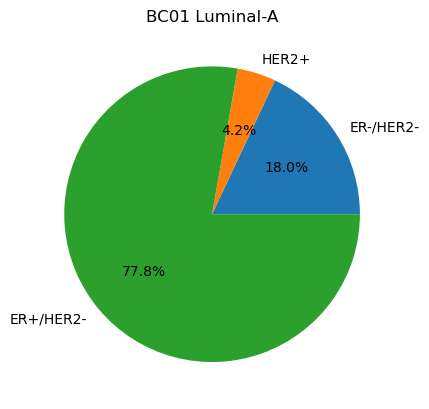

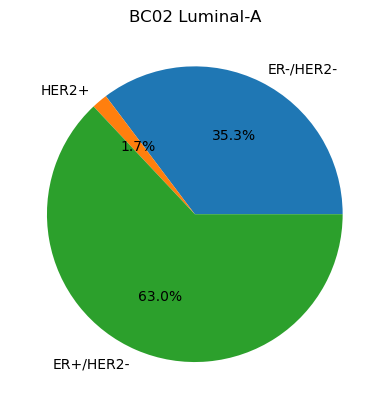

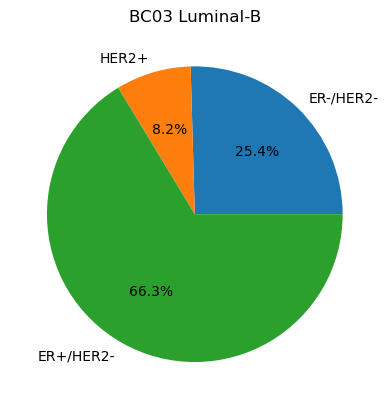

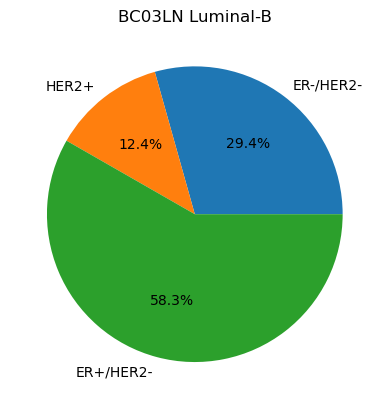

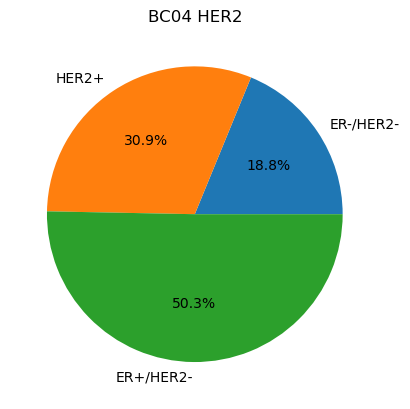

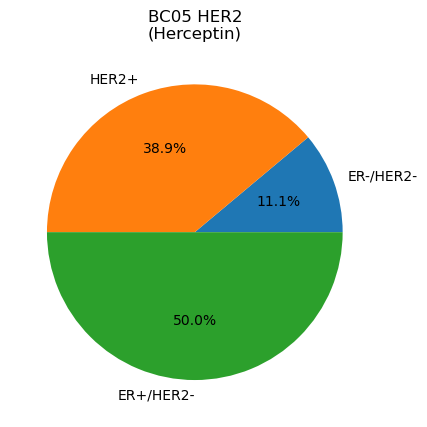

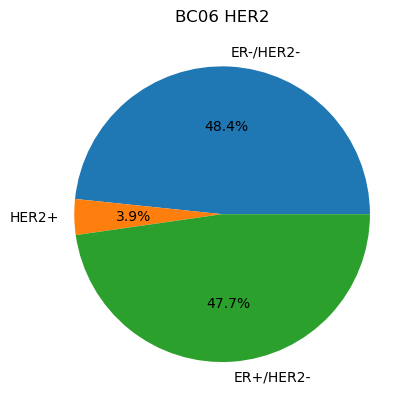

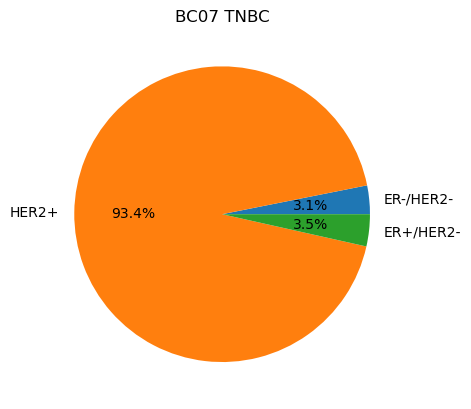

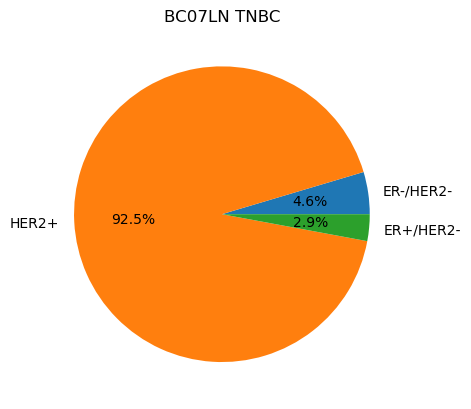

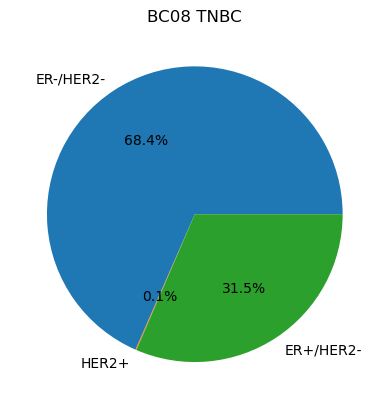

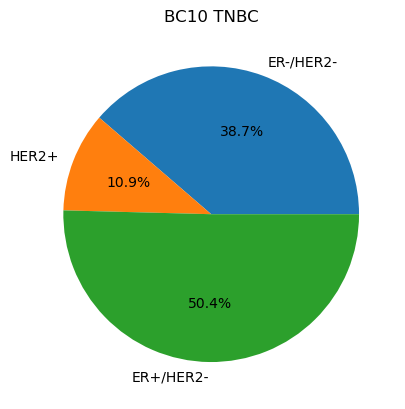

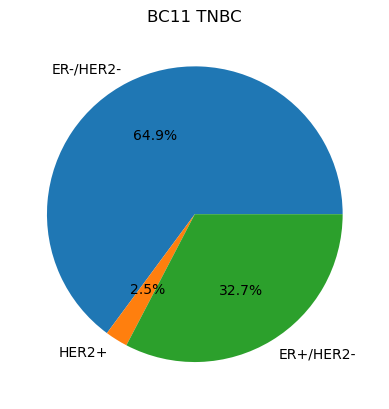

In [57]:
# Iterate over rows in the grouped_df DataFrame
for row in grouped_df.iterrows():
    # Get the tumor group and values for the current row
    tumor_group = row[0]
    values = row[1].values
    if values.sum() == 0:
        continue

    # Create a pie chart for the current row
    plt.figure()
    plt.pie(values, labels=grouped_df.columns, autopct='%1.1f%%')
    plt.title(tumor_group)

plt.show()